# Step 1: Import Libraries and Generate Synthetic Data

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch import nn, optim

# Seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)



In [2]:
# Generate synthetic data
def generate_data(size=1000):
    x = np.random.uniform(-3, 3, (size, 3))
    y = np.sin(x[:, 0]) + x[:, 1]**2 - np.log(1 + np.abs(x[:, 2])) + np.random.normal(0, 0.1, size)
    return x, y.reshape(-1, 1)

x_np, y_np = generate_data()

# Convert numpy arrays to torch tensors
x = torch.tensor(x_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)




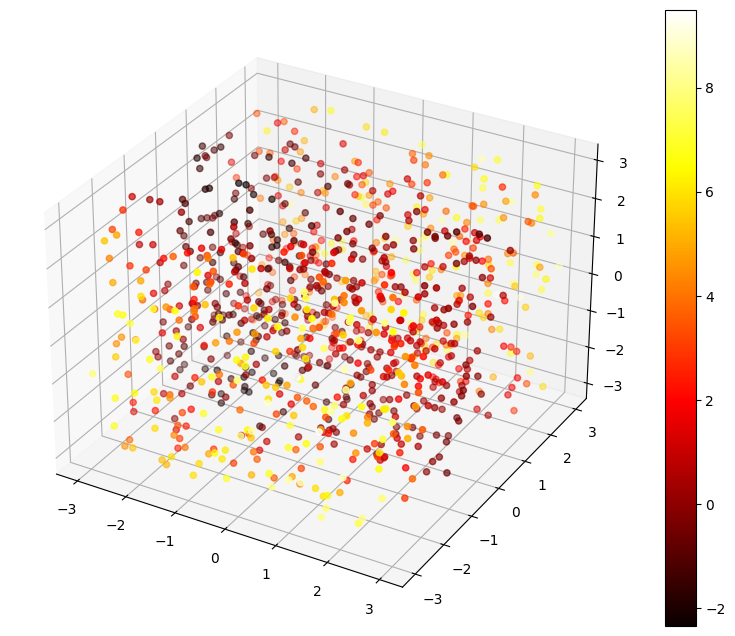

In [3]:
# 4D plot function
def plot_4d(x, y):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    img = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y.squeeze(), cmap=plt.hot())
    fig.colorbar(img)
    plt.show()

# Plotting the synthetic data
plot_4d(x_np, y_np)

# Step 2: Define the Neural Network Using PyTorch Modules

In [4]:
class ThreeLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Step 3: Training the Model

Epoch [0/1000], Loss: 15.0281
Epoch [100/1000], Loss: 0.1491
Epoch [200/1000], Loss: 0.0463
Epoch [300/1000], Loss: 0.0220
Epoch [400/1000], Loss: 0.0166
Epoch [500/1000], Loss: 0.0139
Epoch [600/1000], Loss: 0.0119
Epoch [700/1000], Loss: 0.0111
Epoch [800/1000], Loss: 0.0110
Epoch [900/1000], Loss: 0.0097


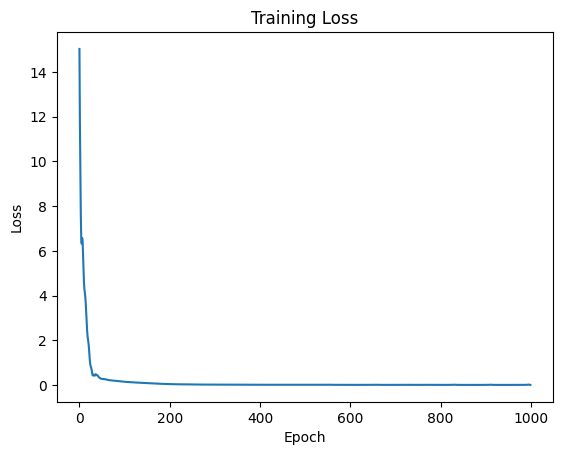

In [5]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 3
hidden_size = 64
output_size = 1
learning_rate = 0.01
epochs = 1000

# Model, Loss, Optimizer
model = ThreeLayerNN(input_size, hidden_size, output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

x, y = x.to(device), y.to(device)

# Training loop
losses = []
for epoch in range(epochs):
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

# Plot training loss
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# Step 4: Visualization of Predicted vs. Actual Values

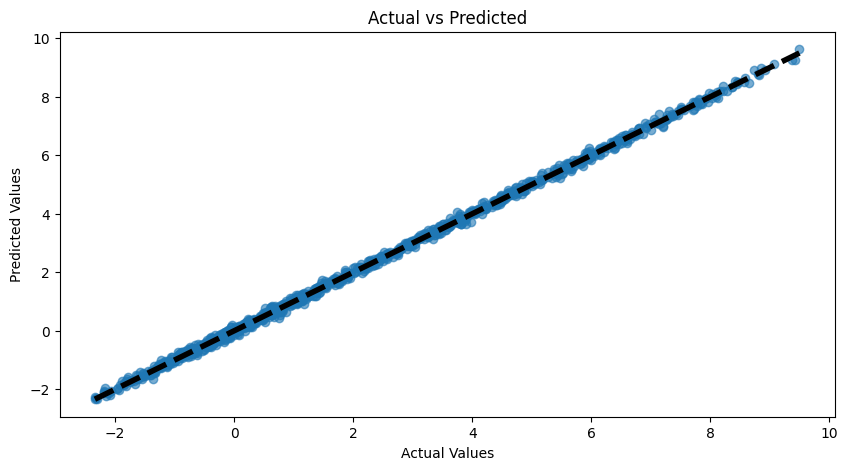

In [6]:
# Predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(x).cpu().numpy()

# Actual vs Predicted plot
y_actual = y.cpu().numpy()
plt.figure(figsize=(10, 5))
plt.scatter(y_actual, predictions, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=4)  # Line for perfect predictions
plt.show()
